In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
edc_out = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/EDC/output.txt', sep='\t')
df_out = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/DF/output.txt', sep='\t')
edml_out = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/EDML/output.txt', sep='\t')
wdc_out = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/WDC/output.txt', sep='\t')

,#depth,ice_age,sigma_ice_age,air_age,sigma_air_age,sigma_delta_age,deporate,sigma_deporate,thinning,sigma_thinning,...,deporate_model,sigma_deporate_model,thinning_model,sigma_thinning_model,LID_model,sigma_LID_model,icelayerthick,sigma_icelayerthick,airlayerthick,sigma_airlayerthick
0,0.00,-53.792392,8.715266,NaN,NaN,NaN,0.029111,0.002419,1.000129,0.002328,...,0.03099,0.2,1.000140,0.002365,98.0939,0.2,0.080067,0.006651,NaN,NaN
1,0.55,-46.923143,8.393817,NaN,NaN,NaN,0.029105,0.002319,1.000049,0.002320,...,0.03099,0.2,1.000060,0.002428,98.0939,0.2,0.080042,0.006377,NaN,NaN
2,1.10,-40.051778,8.097119,NaN,NaN,NaN,0.029096,0.002199,0.999973,0.002315,...,0.03099,0.2,0.999985,0.002491,98.0939,0.2,0.084223,0.006365,NaN,NaN
3,1.65,-33.521474,7.835110,NaN,NaN,NaN,0.029087,0.002102,0.999903,0.002313,...,0.03099,0.2,0.999915,0.002554,98.0939,0.2,0.088870,0.006420,NaN,NaN
4,2.20,-27.332639,7.602240,NaN,NaN,NaN,0.029078,0.002018,0.999816,0.002313,...,0.03099,0.2,0.999829,0.002617,98.0939,0.2,0.072683,0.005042,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5922,3257.10,927395.890554,43874.901067,923615.240873,43909.251977,467.006576,0.013580,0.002015,0.040347,0.019875,...,0.01358,0.2,0.040516,0.499681,75.0113,0.1,0.000548,0.000282,0.000994,0.000171
5923,3257.65,928399.699114,44213.156058,924620.848298,44227.340127,531.236276,0.013770,0.002104,0.040361,0.019887,...,0.01377,0.2,0.040520,0.499747,75.0113,0.1,0.000556,0.000287,0.001020,0.000170
5924,3258.20,929389.327522,44544.966326,925601.071678,44533.298651,458.250052,0.013960,0.002220,0.040375,0.019953,...,0.01396,0.2,0.040525,0.499814,75.0113,0.1,0.000564,0.000293,0.001031,0.000171
5925,3258.75,930365.137809,44870.519919,926571.302258,44848.459405,514.828212,0.013960,0.002321,0.040388,0.020071,...,0.01396,0.2,0.040529,0.499880,75.0113,0.1,0.000564,0.000295,0.001030,0.000194


In [33]:
tiepoints1 = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/DF-EDC/off_airair_synchro_horizons.txt', sep='\t',skiprows=2, names=['df', 'edc', 'age_unc', 'comment'])
tiepoints2 = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/EDC-EDML/off_airair_synchro_horizons.txt', delim_whitespace=True, skiprows=2, names=['edc', 'edml', 'age_unc', 'comment'])
tiepoints3 = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/EDC-WDC/off_airair_synchro_horizons.txt', sep='\t', skiprows=2, names=['edc', 'wdc', 'age_unc', 'comment'])

/var/folders/cd/1mh45k3j19g5g_kxkz_17xvc0000gn/T/ipykernel_38440/2032353149.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  tiepoints2 = pd.read_csv('/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/BICC2025/EDC-EDML/off_airair_synchro_horizons.txt', delim_whitespace=True, skiprows=2, names=['edc', 'edml', 'age_unc', 'comment'])


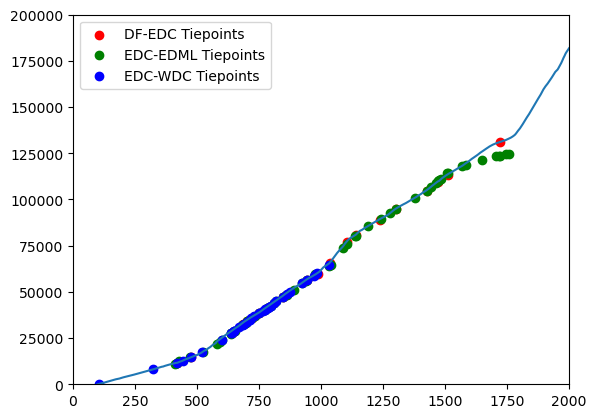

In [42]:
plt.plot(edc_out['#depth'], edc_out['air_age'])

plt.scatter(tiepoints1['edc'], np.interp(tiepoints1['df'], df_out['#depth'], df_out['air_age']), color='red', label='DF-EDC Tiepoints')
plt.scatter(tiepoints2['edc'], np.interp(tiepoints2['edml'], edml_out['#depth'], edml_out['air_age']), color='green', label='EDC-EDML Tiepoints')
plt.scatter(tiepoints3['edc'], np.interp(tiepoints3['wdc'], wdc_out['#depth'], wdc_out['air_age']), color='blue', label='EDC-WDC Tiepoints')
plt.xlim(0,2000)
plt.ylim(0,200000)
plt.legend()

In [12]:
temp.to_csv('/Users/quinnmackay/Documents/GitHub/BICC/Paleochrono BICC Work/Paleochrono BICC Experiment/Test_Exp/lidexp.txt', sep='\t', index=False)